# Comparison of Line search algorithms
- Armijo-Wolfe
- Backtracking

In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *

### Dataset MONK

In [3]:
# choose monk dataset
monk = str(3)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
x_train, x_test = decode_patterns(encoding, features, train_data, test_data)
y_train, y_test = transform_labels(train_data, test_data)

### Dataset ML-CUP

In [2]:
# 1. read file train set
df = pd.read_csv("../Data/MLCup/ML-CUP17-TR_shuffled.csv", comment='#')
#df = pd.read_csv("../Data/MLCup/ML-CUP17-TR.csv", comment='#')
features_col = ["input1","input2","input3","input4","input5",
                "input6","input7", "input8","input9","input10"]
targets_col = ["target_x", "target_y"]

# 2. divide pattern and targets
patterns, labels = divide_patterns_labels(df,features_col,targets_col)

# 3. divide in development set and test set
x_train, y_train, x_test, y_test = holdout_cup(patterns, labels, fraction_tr=0.8)

In [3]:
architecture = [10, 5, 2]
neurons = [InputNeuron, TanHNeuron, OutputNeuron]
common_network = Network(architecture, neurons)
loss_object = SquaredError("tangentH")
line_search_methods = ['wolfe', 'backtracking']

c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.0
epsilon = 1e-5
m = 5
epochs = 1000

In [4]:
results_bfgs =  {'alpha_wolfe': [], 'alpha_backtracking': [], 
                 'loss_wolfe': [], 'loss_backtracking': [],
                 'grad_wolfe': [], 'grad_backtracking': [],
                }

results_lbfgs =  {'alpha_wolfe': [], 'alpha_backtracking': [], 
                 'loss_wolfe': [], 'loss_backtracking': [],
                 'grad_wolfe': [], 'grad_backtracking': [],
                }

### Training

In [5]:
# BFGS
for line_search in line_search_methods:
    print "BFGS", line_search
    network = copy.deepcopy(common_network)
    losses, _, _, _, alphas, norm_grad, _ = network.train_BFGS(x_train=x_train,
                               y_train=y_train, 
                               x_test=None, 
                               y_test=None,
                               theta=theta, c_1=c_1, c_2=c_2, 
                               lossObject=loss_object, 
                               regularization=lambda_, 
                               epochs=epochs, epsilon=epsilon,
                               line_search=line_search)
    
    results_bfgs['alpha_' + line_search] = alphas
    results_bfgs['loss_' + line_search] = losses
    results_bfgs['grad_' + line_search] = norm_grad

# L-BFGS
for line_search in line_search_methods:
    print "L-BFGS", line_search
    network = copy.deepcopy(common_network)
    losses, _, _, _, alphas, norm_grad, _ = network.train_LBFGS(x_train=x_train,
                               y_train=y_train, 
                               x_test=None, 
                               y_test=None,
                               theta=theta, c_1=c_1, c_2=c_2, 
                               lossObject=loss_object, 
                               regularization=lambda_, 
                               epochs=epochs, epsilon=epsilon, m=m,
                               line_search=line_search)
    
    results_lbfgs['alpha_' + line_search] = alphas
    results_lbfgs['loss_' + line_search] = losses
    results_lbfgs['grad_' + line_search] = norm_grad

BFGS wolfe
stop: gradient norm, epoch 525
BFGS backtracking
stop - matrix H not positive definite. Eigenvalues: [-5.53896121e+01+0.00000000e+00j  1.92906221e+01+0.00000000e+00j
  1.08145890e+01+0.00000000e+00j  6.29929159e+00+0.00000000e+00j
  2.19240070e+00+0.00000000e+00j  1.85637214e+00+0.00000000e+00j
  1.54889388e+00+0.00000000e+00j  1.48929041e+00+0.00000000e+00j
  1.47996484e-03+0.00000000e+00j  2.89262972e-02+0.00000000e+00j
  7.60360140e-02+0.00000000e+00j  9.75961706e-02+0.00000000e+00j
  1.21007922e-01+0.00000000e+00j  1.39941655e-01+0.00000000e+00j
  1.58484003e-01+0.00000000e+00j  1.74640026e-01+0.00000000e+00j
  2.29122082e-01+0.00000000e+00j  2.48538680e-01+0.00000000e+00j
  2.87270686e-01+0.00000000e+00j  5.31193399e-01+0.00000000e+00j
  6.35800263e-01+0.00000000e+00j  1.22256946e+00+0.00000000e+00j
  7.40903188e-01+0.00000000e+00j  7.55810953e-01+0.00000000e+00j
  1.15424114e+00+0.00000000e+00j  8.23494977e-01+0.00000000e+00j
  1.09851370e+00+0.00000000e+00j  8.8446404

### Plots

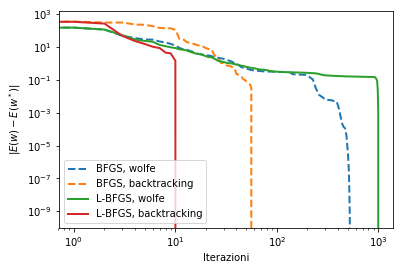

In [6]:
def relative_gap(x):
    x = np.array(x)
    value_at_x_star = x[-1]
    relative_gap_list = np.abs(x - value_at_x_star)
    return relative_gap_list

losses_w_bfgs = relative_gap(results_bfgs['loss_wolfe'])
losses_b_bfgs = relative_gap(results_bfgs['loss_backtracking'])
losses_w_lbfgs = relative_gap(results_lbfgs['loss_wolfe'])
losses_b_lbfgs = relative_gap(results_lbfgs['loss_backtracking'])
    

plt.plot(range(len(losses_w_bfgs)), losses_w_bfgs, '--', label='BFGS, wolfe', linewidth=2)
plt.plot(range(len(losses_b_bfgs)), losses_b_bfgs, '--', label='BFGS, backtracking', linewidth=2)
plt.plot(range(len(losses_w_lbfgs)), losses_w_lbfgs, label='L-BFGS, wolfe', linewidth=2)
plt.plot(range(len(losses_b_lbfgs)), losses_b_lbfgs, label='L-BFGS, backtracking', linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel(r'$|E(w) - E(w^*)|$')
plt.xlabel('Iterazioni')
plt.show()

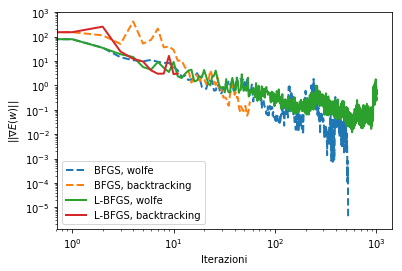

In [7]:
grad_w_bfgs = results_bfgs['grad_wolfe']
grad_b_bfgs = results_bfgs['grad_backtracking']
grad_w_lbfgs = results_lbfgs['grad_wolfe']
grad_b_lbfgs = results_lbfgs['grad_backtracking']

plt.plot(range(len(grad_w_bfgs)), grad_w_bfgs, '--', label='BFGS, wolfe', linewidth=2)
plt.plot(range(len(grad_b_bfgs)), grad_b_bfgs, '--', label='BFGS, backtracking', linewidth=2)
plt.plot(range(len(grad_w_lbfgs)), grad_w_lbfgs, label='L-BFGS, wolfe', linewidth=2)
plt.plot(range(len(grad_b_lbfgs)), grad_b_lbfgs, label='L-BFGS, backtracking', linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$||\nabla E(w)||$')
plt.xlabel('Iterazioni')
plt.legend(loc='best')
plt.show()

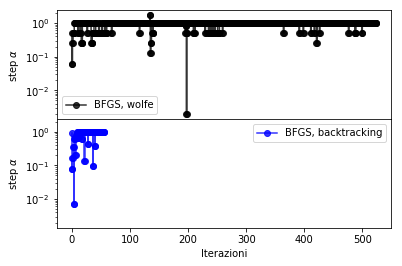

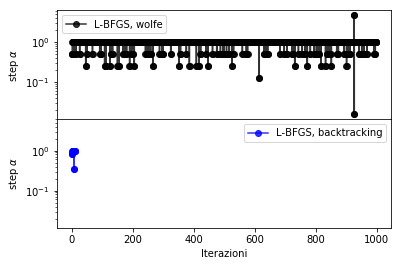

In [8]:
alpha_w_bfgs = results_bfgs['alpha_wolfe']
alpha_b_bfgs = results_bfgs['alpha_backtracking']
alpha_w_lbfgs = results_lbfgs['alpha_wolfe']
alpha_b_lbfgs = results_lbfgs['alpha_backtracking']

plot_alpha_vs_iterations(alpha_w_bfgs, alpha_b_bfgs, label_1='BFGS, wolfe', label_2='BFGS, backtracking')
plot_alpha_vs_iterations(alpha_w_lbfgs, alpha_b_lbfgs, label_1='L-BFGS, wolfe', label_2='L-BFGS, backtracking')